# Single-cell analysis and prediction
Author: Margaret Paiva

### Dependencies and setting

In [1]:
import pandas as pd
import scanpy as sc

In [9]:
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.1 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.7


### Data

In [2]:
# table with clinical responses
meta = pd.read_csv('data/GSE120575_patient_ID_single_cells.txt.gz', 
                   sep="\t", encoding="latin", 
                   skiprows=19).iloc[:, :7]
# remove additional information after sample table
meta = meta.iloc[:16291]

# rename columns by removing the `characteristics: ` prefix to make it more concise
meta.columns = [x.replace("characteristics: ", "") for x in meta.columns]

# rename the long `patient ID (...)` column to simple sample_id
meta.rename(
    columns={"patinet ID (Pre=baseline; Post= on treatment)": "sample_id"},
    inplace=True
)

# add columns that seperate sample_id for later analysis
meta["patient_id"] = [x.split("_")[1] for x in meta.sample_id]
meta["time_point"] = [x.split("_")[0] for x in meta.sample_id]

meta

,Sample name,title,source name,organism,sample_id,response,therapy,patient_id,time_point
0,Sample 1,A10_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,P1,Pre
1,Sample 2,A11_P1_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,P1,Pre
2,Sample 3,A11_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,P1,Pre
3,Sample 4,A11_P4_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,P1,Pre
4,Sample 5,A12_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4,P1,Pre
...,...,...,...,...,...,...,...,...,...
16286,Sample 16287,H5_P5_M67_L001_T_enriched,Melanoma single cell,Homo sapiens,Post_P6,Non-responder,anti-PD1,P6,Post
16287,Sample 16288,H6_P5_M67_L001_T_enriched,Melanoma single cell,Homo sapiens,Post_P6,Non-responder,anti-PD1,P6,Post
16288,Sample 16289,H7_P5_M67_L001_T_enriched,Melanoma single cell,Homo sapiens,Post_P6,Non-responder,anti-PD1,P6,Post
16289,Sample 16290,H8_P5_M67_L001_T_enriched,Melanoma single cell,Homo sapiens,Post_P6,Non-responder,anti-PD1,P6,Post


In [11]:
# table with sc gene expression
# ge = pd.read_csv('data/GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.txt.gz', 
#                  sep="\t", skiprows=3)

adata = sc.read_text('data/GSE120575_melanoma_scrna_tpm.txt.gz').transpose()
adata.var_names_make_unique()b
adata

AnnData object with n_obs × n_vars = 16291 × 55737

In [4]:
adata.obs

""
A10_P3_M11
A11_P1_M11
A11_P3_M11
A11_P4_M11
A12_P3_M11
...
H5_P5_M67_L001_T_enriched
H6_P5_M67_L001_T_enriched
H7_P5_M67_L001_T_enriched
H8_P5_M67_L001_T_enriched


In [5]:
adata.var

""
TSPAN6
TNMD
DPM1
SCYL3
C1orf112
...
RP4-621B10.8
RP11-114I8.4
RP11-180C16.1
AP000230.1


In [17]:
adata.X[0:5, 0:10]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 9.24, 0.  , 0.  , 0.  , 0.  , 0.  , 1.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 7.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [18]:
# Get the statistics of the data
# These TPM values; no logarithmizing
mean_expr = pd.Series(adata.X.mean(axis=0))
mean_expr.index = adata.var.index
mean_expr.describe()

count    45884.000000
mean         0.334004
std          0.917913
min          0.000101
25%          0.003072
50%          0.015890
75%          0.197407
max         16.430939
dtype: float64

### Preprocessing

Basic filter:

In [12]:
# Each cell should have a minimum genes expressed;
# Otherwise, they are dropouts
sc.pp.filter_cells(adata, min_genes=200)
# Each genes should be expressed in at least a certain number of cells
# to be considered as an expressed gene
sc.pp.filter_genes(adata, min_cells=3)
adata

Find and filter genes that are potentially noisy: 

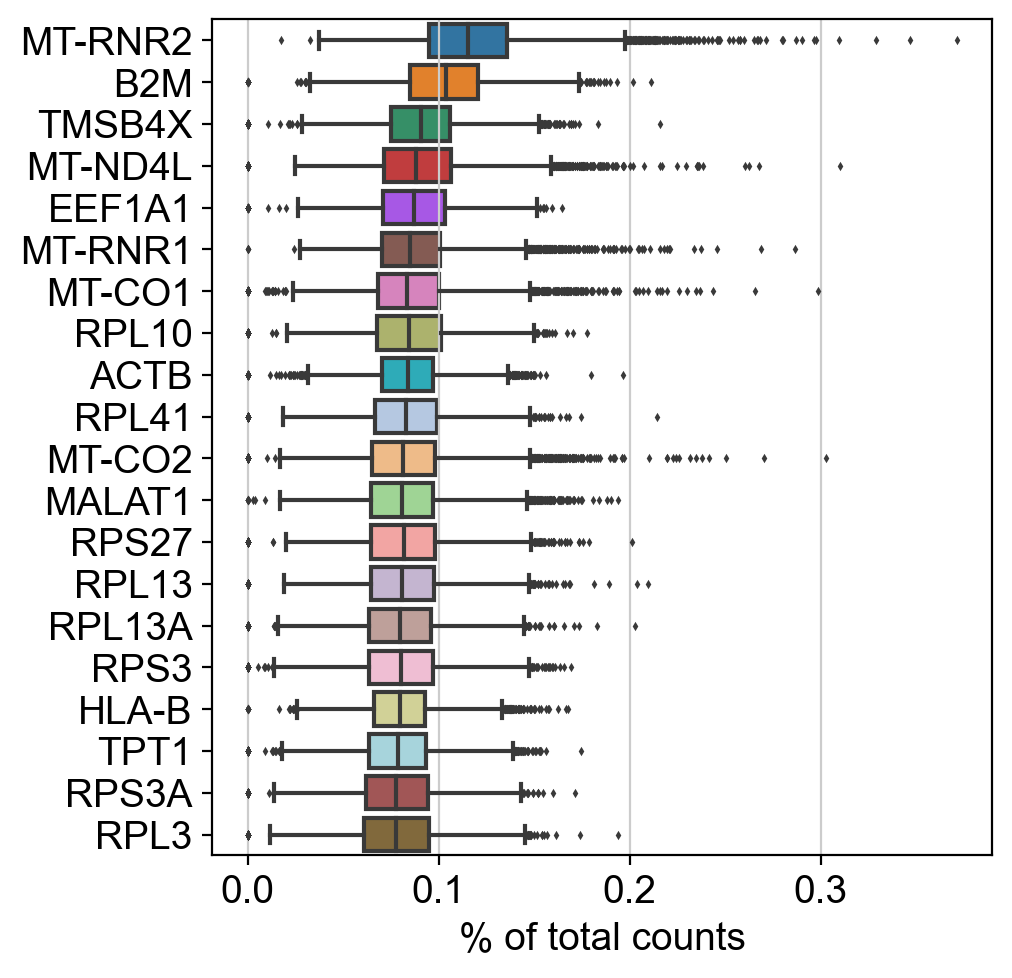

In [10]:
# First, plot genes that yield the highest fraction of counts in each single cell, 
# across all cells
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
# High proportions of mitochondrial genes are indicative of poor-quality cells
# possibly because of loss of cytoplasmic RNA from perforated cells

# annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, 
                           qc_vars=['mt'], 
                           percent_top=None, 
                           log1p=False, 
                           inplace=True)
adata

AnnData object with n_obs × n_vars = 16291 × 45884
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

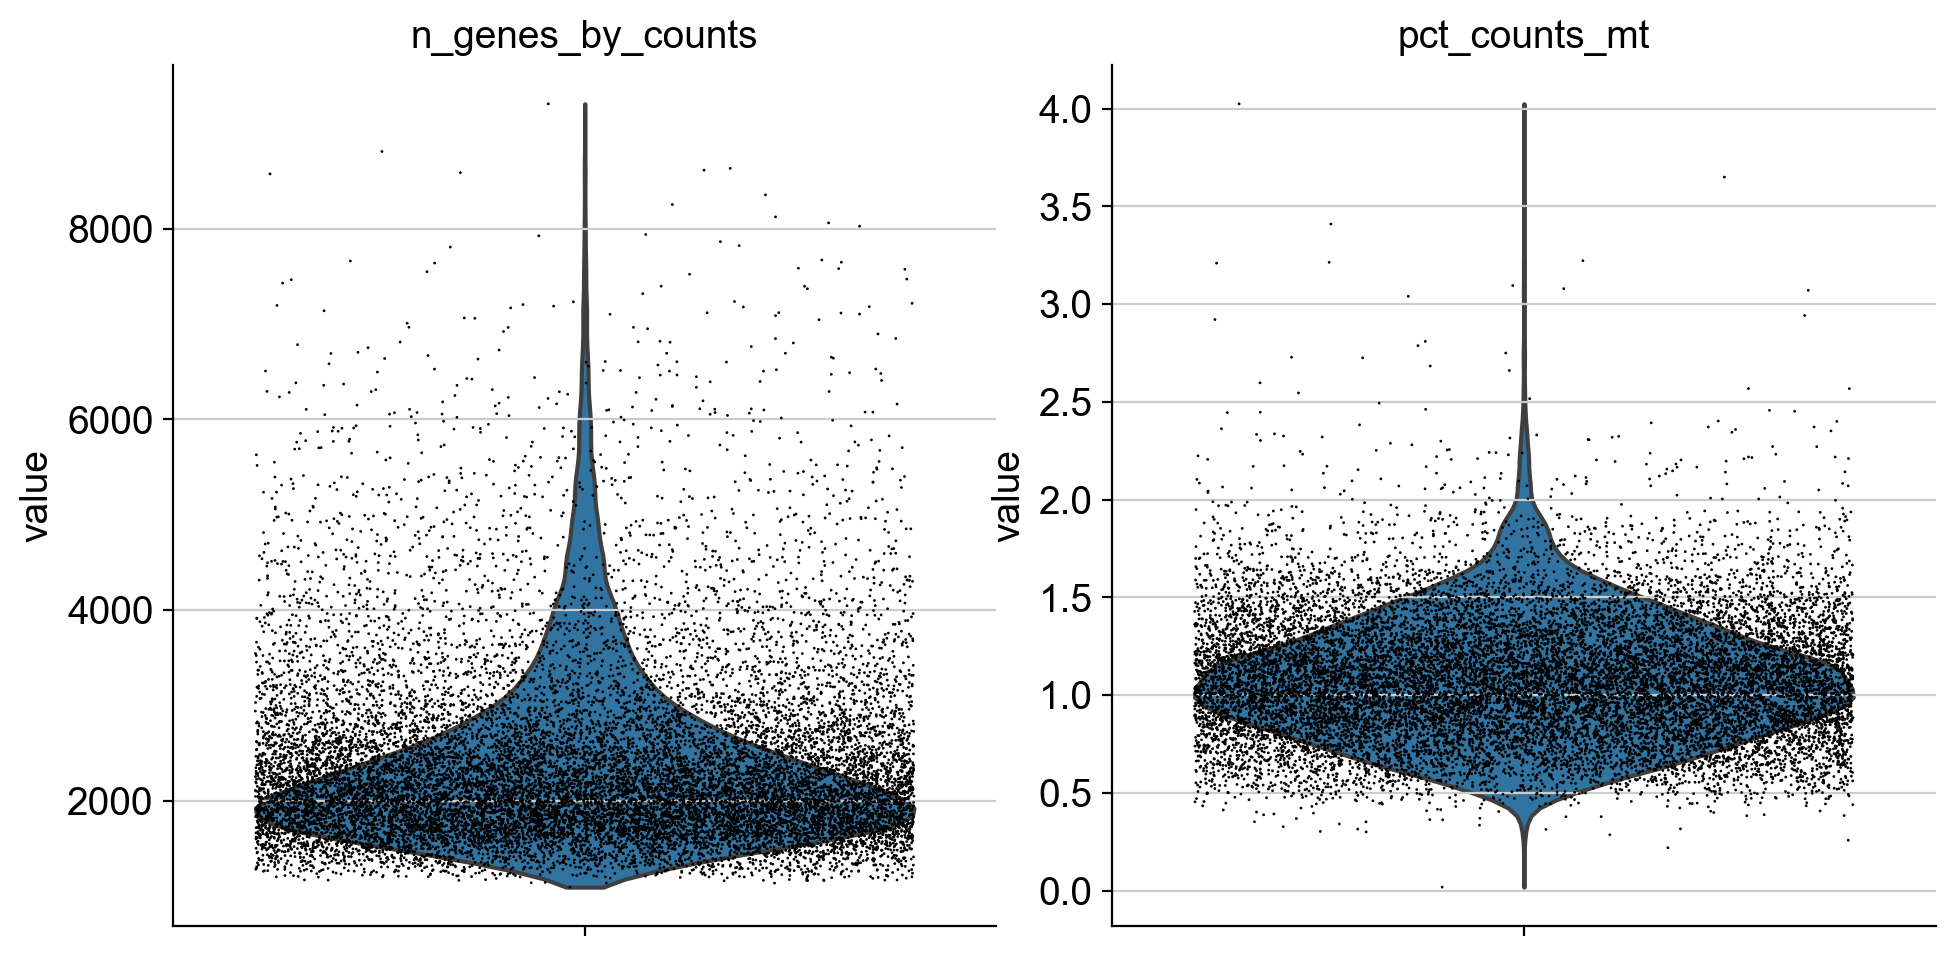

In [21]:
sc.pl.violin(adata, ['n_genes_by_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [22]:
# filtering noisy genes (samples with too many genes expressed)
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
# filtering samples with too many mitochondrial genes
adata = adata[adata.obs.pct_counts_mt < 2.5, :]
adata

Skip normalization because the values are already in TPM

Logarithmize the data:

In [24]:
sc.pp.log1p(adata)
adata

AnnData object with n_obs × n_vars = 16215 × 45884
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

### Principal component analysis

In [25]:
sc.tl.pca(adata, svd_solver='arpack')
adata

AnnData object with n_obs × n_vars = 16215 × 45884
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

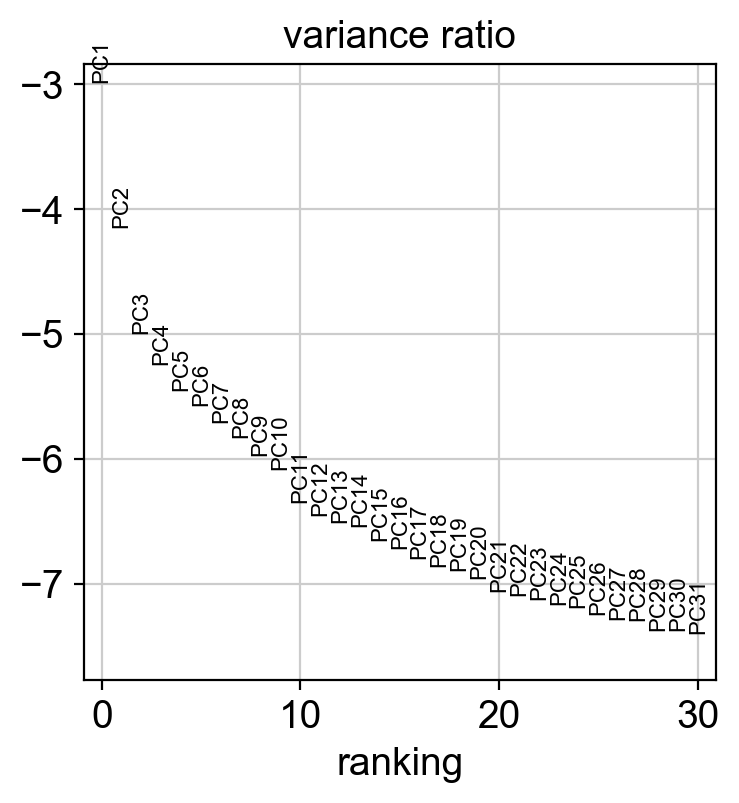

In [26]:
sc.pl.pca_variance_ratio(adata, log=True)

### Computing the neighborhood graph

In [27]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
adata

AnnData object with n_obs × n_vars = 16215 × 45884
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Embedding the neighborhood graph

In [30]:
sc.tl.umap(adata)
adata

AnnData object with n_obs × n_vars = 16215 × 45884
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

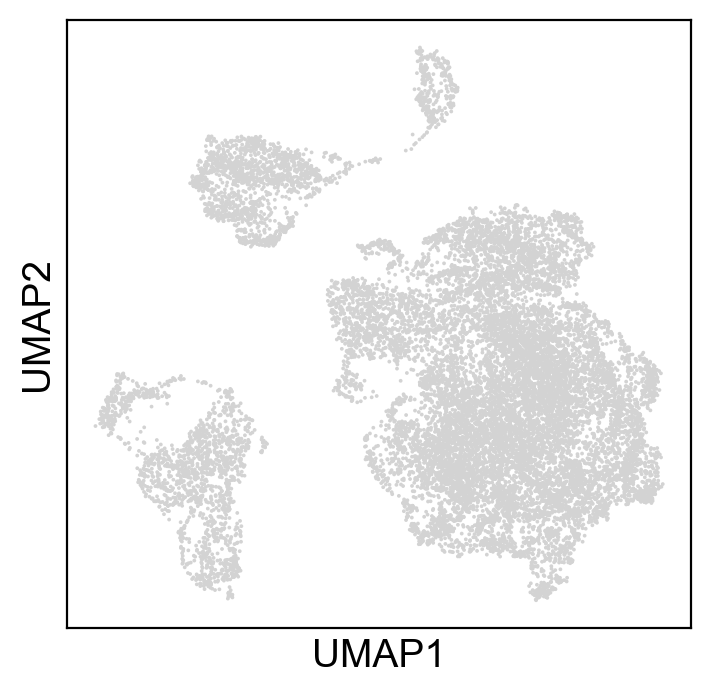

In [31]:
sc.pl.umap(adata)

### Clustering the neighborhood graph

In [43]:
sc.tl.leiden(adata, resolution=0.26)
adata

AnnData object with n_obs × n_vars = 16215 × 45884
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

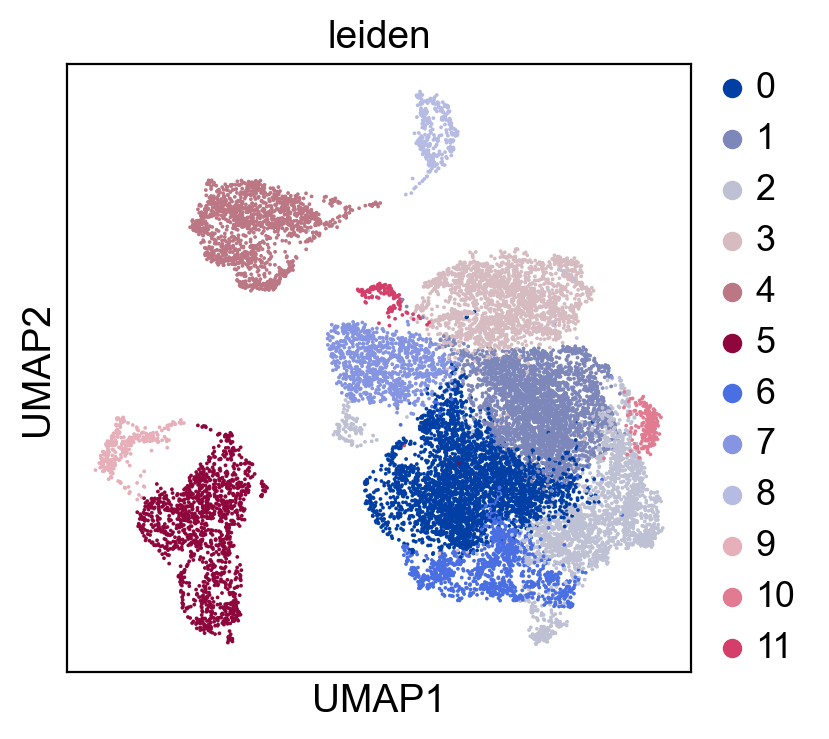

In [44]:
sc.pl.umap(adata, color=['leiden'])